In [1]:
#-------------辅助工具-------------#
import os #文档路径
import numpy as np
import pandas as pd
pd.options.display.max_columns = None  # 显示所有列
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # 取消科学计数法

from time import time #计时
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #显示所有输出

import pickle #训练模型的保存与读取
from sklearn.externals import joblib #保存训练模型

#-------------数据可视化工具-------------#
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Simhei'] # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False # 解决坐标轴刻度负号乱码

#-------------数据清洗工具-------------#
from sklearn.impute import SimpleImputer #缺失值填充
from sklearn.ensemble import RandomForestRegressor #也可作为数据清洗工具，填充缺失值；
from sklearn.ensemble import RandomForestClassifier  #也可作为数据清洗工具，填充缺失值；能接受输入空间存子异常值，但不能接受空值

#-------------统计检验工具-------------#
from scipy.stats import chi2_contingency #数值型特征检验，检验特征与标签的关系
from scipy.stats import f_oneway #分类型特征检验，检验特征与标签的关系
from scipy.stats import ttest_ind #分类型特征检验，检验特征与标签的关系

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 三、数据探索分析

In [2]:
data=pd.read_csv('./clean_df_train.csv',index_col='Unnamed: 0')
data.shape
data.head()

(6000, 12)

,产品使用分数,用户地区,性别,年龄,使用累计时间,点数余额,产品服务使用量,是否使用信用卡付月费,是否为活跃用户,估计薪资,购买与否,客户ID
0,628.0000,1,1,51.0000,2,155903.8200,2,1,1,71159.8400,0,6518
1,696.0000,0,1,27.0000,4,20026.2949,2,0,0,196111.3500,0,5195
2,655.3096,1,0,40.0000,3,114796.4766,2,1,1,92655.0312,0,1786
3,640.4673,0,0,39.1471,3,93346.4766,1,1,0,82969.5469,1,6151
4,666.4573,2,0,27.0000,9,0.0000,1,1,1,107955.6700,0,7577


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 12 columns):
产品使用分数        6000 non-null float64
用户地区          6000 non-null int64
性别            6000 non-null int64
年龄            6000 non-null float64
使用累计时间        6000 non-null int64
点数余额          6000 non-null float64
产品服务使用量       6000 non-null int64
是否使用信用卡付月费    6000 non-null int64
是否为活跃用户       6000 non-null int64
估计薪资          6000 non-null float64
购买与否          6000 non-null int64
客户ID          6000 non-null int64
dtypes: float64(4), int64(8)
memory usage: 609.4 KB


In [4]:
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
cates=['用户地区', '性别', '使用累计时间','产品服务使用量', '是否使用信用卡付月费','是否为活跃用户']

### （一）单变量分析

(1)类别特征

In [4]:
cates=['用户地区', '性别', '使用累计时间','产品服务使用量', '是否使用信用卡付月费','是否为活跃用户']
for cate in cates:
    df=data[cate].value_counts() #默认降序排列
    df=pd.concat([df,df/data.shape[0]],axis=1)
    df.columns=[cate,'比重']
    df
    
# 用户地区0，1，2，分别是Taipei，Taichung，Tainan
# 性别0，1，分别是男性，女性

,用户地区,比重
0,3468,0.5780
1,1464,0.2440
2,1068,0.1780


,性别,比重
0,3774,0.6290
1,2226,0.3710


,使用累计时间,比重
4,701,0.1168
9,690,0.1150
2,682,0.1137
3,632,0.1053
8,616,0.1027
1,600,0.1000
5,592,0.0987
6,552,0.0920
7,543,0.0905
10,206,0.0343


,产品服务使用量,比重
1,3266,0.5443
2,2595,0.4325
3,116,0.0193
4,23,0.0038


,是否使用信用卡付月费,比重
1,4761,0.7935
0,1239,0.2065


,是否为活跃用户,比重
1,3234,0.5390
0,2766,0.4610


（2）数值特征

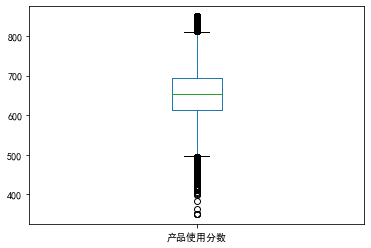

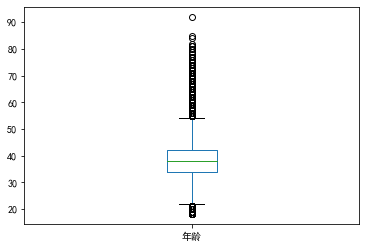

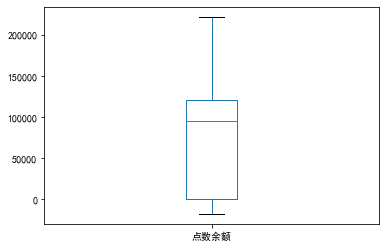

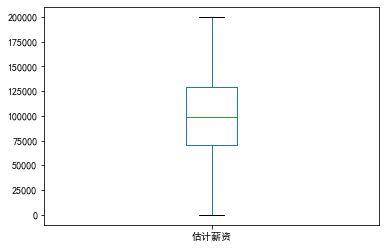

In [5]:
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
for cate in cates:
    data[cate].plot(kind='box')
    plt.show()

Text(0.5, 1.0, '产品使用分数')

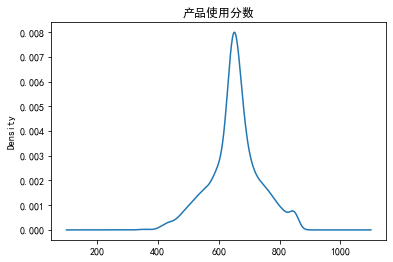

Text(0.5, 1.0, '年龄')

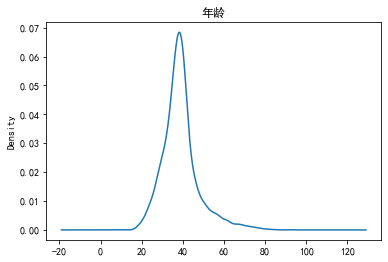

Text(0.5, 1.0, '点数余额')

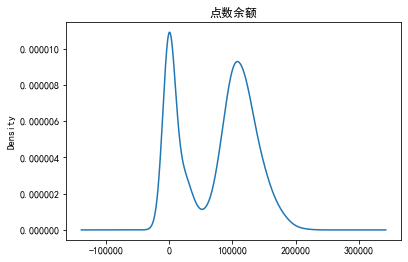

Text(0.5, 1.0, '估计薪资')

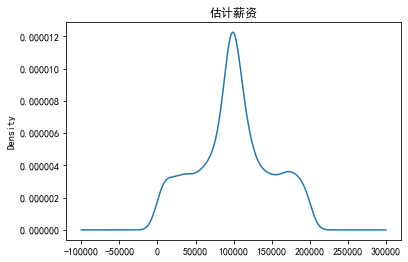

In [6]:
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
for cate in cates:
    data[cate].plot(kind='kde')
    plt.title(cate)
    plt.show()

Text(0.5, 1.0, '产品使用分数')

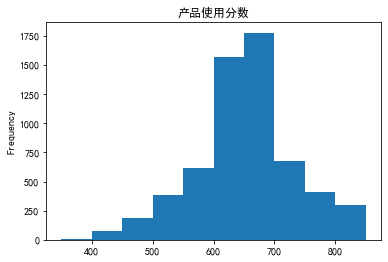

Text(0.5, 1.0, '年龄')

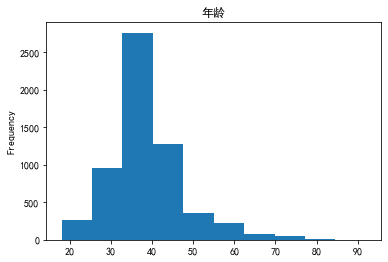

Text(0.5, 1.0, '点数余额')

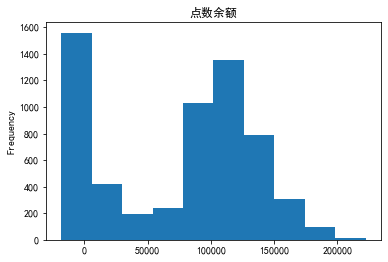

Text(0.5, 1.0, '估计薪资')

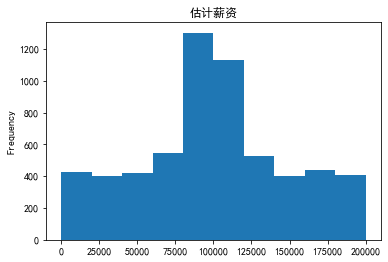

In [7]:
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
for cate in cates:
    data[cate].plot(kind='hist')
    plt.title(cate)
    plt.show()

### （二）特征与标签的关系

In [8]:
data['购买与否'].value_counts()
data['购买与否'].value_counts()/data.shape[0]

0    4777
1    1223
Name: 购买与否, dtype: int64

0   0.7962
1   0.2038
Name: 购买与否, dtype: float64

(1)类别特征

In [9]:
cates=['用户地区', '性别', '使用累计时间','产品服务使用量', '是否使用信用卡付月费','是否为活跃用户']
for cate in cates:
    print(cate,'取值比重：')
    pd.crosstab(index=data['购买与否'],columns=data[cate])/ data[cate].value_counts()

用户地区 取值比重：


用户地区,0,1,2
购买与否,,,
0,0.8279,0.6906,0.8380
1,0.1721,0.3094,0.1620


性别 取值比重：


性别,0,1
购买与否,,
0,0.8328,0.7341
1,0.1672,0.2659


使用累计时间 取值比重：


,0,1,2,3,4,5,6,7,8,9,10
购买与否,,,,,,,,,,,
0,0.7312,0.7983,0.8109,0.7896,0.8174,0.7905,0.8225,0.7956,0.8182,0.7507,0.7816
1,0.2688,0.2017,0.1891,0.2104,0.1826,0.2095,0.1775,0.2044,0.1818,0.2493,0.2184


产品服务使用量 取值比重：


产品服务使用量,1,2,3,4
购买与否,,,,
0,0.7382,0.9033,0.1897,0.0000
1,0.2618,0.0967,0.8103,1.0000


是否使用信用卡付月费 取值比重：


,0,1
购买与否,,
0,0.7821,0.7998
1,0.2179,0.2002


是否为活跃用户 取值比重：


,0,1
购买与否,,
0,0.7408,0.8435
1,0.2592,0.1565


(2)数值特征

Text(0.5, 0, '产品使用分数 distribution by label')

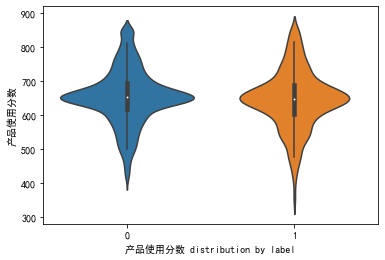

Text(0.5, 0, '年龄 distribution by label')

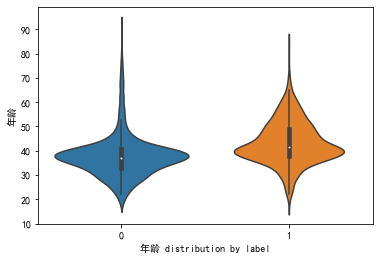

Text(0.5, 0, '点数余额 distribution by label')

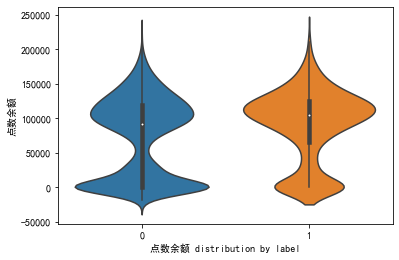

Text(0.5, 0, '估计薪资 distribution by label')

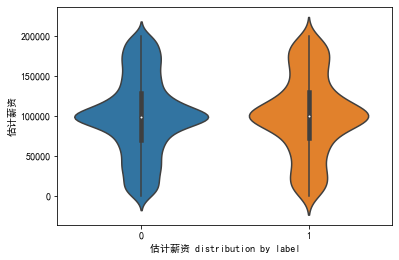

In [10]:
#(1)小提琴图
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
for cate in cates:
    sns.violinplot(y=cate,x='购买与否',data=data)
    plt.xlabel(cate+' distribution by label')
    plt.show()

bins= 3 的直方图：


(array([4647., 1267.,   86.]),
 array([18.        , 42.66666667, 67.33333333, 92.        ]),
 <a list of 3 Patch objects>)

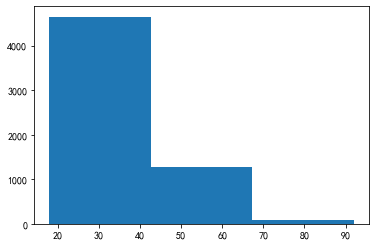

bins= 6 的直方图：


(array([ 843., 3804.,  981.,  286.,   77.,    9.]),
 array([18.        , 30.33333333, 42.66666667, 55.        , 67.33333333,
        79.66666667, 92.        ]),
 <a list of 6 Patch objects>)

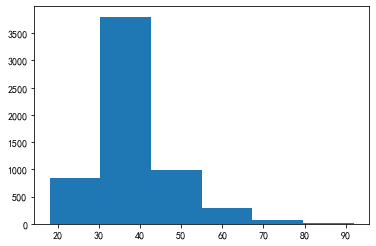

bins= 9 的直方图：


(array([ 335., 1321., 2991.,  807.,  332.,  128.,   63.,   20.,    3.]),
 array([18.        , 26.22222222, 34.44444444, 42.66666667, 50.88888889,
        59.11111111, 67.33333333, 75.55555556, 83.77777778, 92.        ]),
 <a list of 9 Patch objects>)

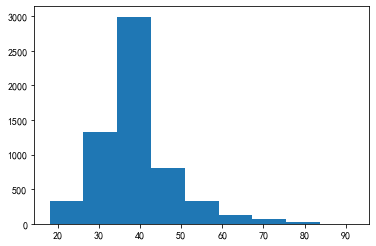

bins= 12 的直方图：


(array([2.010e+02, 6.420e+02, 1.495e+03, 2.309e+03, 6.850e+02, 2.960e+02,
        2.000e+02, 8.600e+01, 5.100e+01, 2.600e+01, 8.000e+00, 1.000e+00]),
 array([18.        , 24.16666667, 30.33333333, 36.5       , 42.66666667,
        48.83333333, 55.        , 61.16666667, 67.33333333, 73.5       ,
        79.66666667, 85.83333333, 92.        ]),
 <a list of 12 Patch objects>)

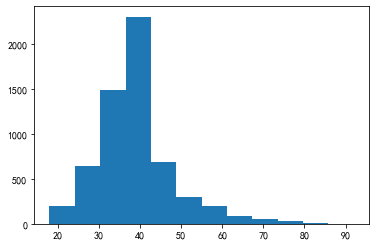

bins= 15 的直方图：


(array([9.400e+01, 3.400e+02, 7.840e+02, 1.606e+03, 1.823e+03, 6.190e+02,
        2.890e+02, 1.800e+02, 1.170e+02, 6.200e+01, 4.700e+01, 2.700e+01,
        9.000e+00, 2.000e+00, 1.000e+00]),
 array([18.        , 22.93333333, 27.86666667, 32.8       , 37.73333333,
        42.66666667, 47.6       , 52.53333333, 57.46666667, 62.4       ,
        67.33333333, 72.26666667, 77.2       , 82.13333333, 87.06666667,
        92.        ]),
 <a list of 15 Patch objects>)

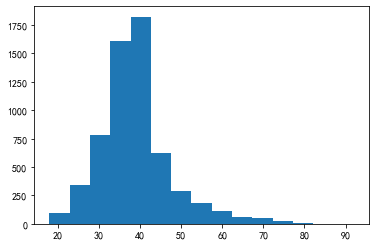

bins= 18 的直方图：


(array([9.400e+01, 2.410e+02, 5.080e+02, 8.130e+02, 1.584e+03, 1.407e+03,
        5.340e+02, 2.730e+02, 1.740e+02, 1.580e+02, 7.800e+01, 5.000e+01,
        3.600e+01, 2.700e+01, 1.400e+01, 6.000e+00, 2.000e+00, 1.000e+00]),
 array([18.        , 22.11111111, 26.22222222, 30.33333333, 34.44444444,
        38.55555556, 42.66666667, 46.77777778, 50.88888889, 55.        ,
        59.11111111, 63.22222222, 67.33333333, 71.44444444, 75.55555556,
        79.66666667, 83.77777778, 87.88888889, 92.        ]),
 <a list of 18 Patch objects>)

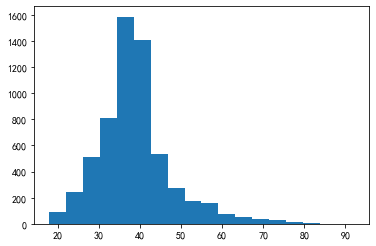

In [11]:
#年龄分箱探索

#问题：分箱的要点是什么？

pdata=data.copy()
for i in range(3,20,3):
    print('bins=',i,'的直方图：')
    plt.hist(pdata['年龄'],bins=i)
    plt.show()

In [12]:
#年龄分箱探索

pdata=data.copy()
pdata['年龄段']=pd.cut(pdata['年龄'],bins=5)
pd.crosstab(index=pdata['购买与否'],columns=pdata['年龄段'])/ pdata['年龄段'].value_counts()

,"(17.926, 32.8]","(32.8, 47.6]","(47.6, 62.4]","(62.4, 77.2]","(77.2, 92.0]"
购买与否,,,,,
0,0.9187,0.8083,0.4505,0.8162,0.9167
1,0.0813,0.1917,0.5495,0.1838,0.0833


In [13]:
#年龄分箱探索

pdata=data.copy()
pdata['年龄段']=pd.qcut(pdata['年龄'],q=5)
pd.crosstab(index=pdata['购买与否'],columns=pdata['年龄段'])/ pdata['年龄段'].value_counts()

#结论：显然不合理。

,"(17.999, 32.346]","(32.346, 36.814]","(36.814, 39.377]","(39.377, 43.093]","(43.093, 92.0]"
购买与否,,,,,
0,0.9175,0.8858,0.8408,0.7625,0.5742
1,0.0825,0.1142,0.1592,0.2375,0.4258


### （三）特征间关系

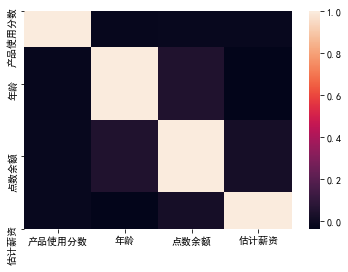

In [14]:
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
sns.heatmap(data[cates].corr())

### （四）统计检验

（1）类别特征

In [16]:
p_list=[]
cates=['用户地区', '性别', '使用累计时间','产品服务使用量', '是否使用信用卡付月费','是否为活跃用户']
for cate in cates:
    print(cate+'与标签的卡方检验：')
    obs=pd.crosstab( index=data['购买与否'],columns=data[cate] )
    chi2_contingency(obs)
    chi2, p, dof, expect=chi2_contingency(obs)
    p_list.append(p)
print('卡方检验的p值：')
pd.Series(data=np.array(p_list),index=cates)

#结论：特征“用户地区”“性别”“产品服务使用量”“是否为活跃用户”显著地影响标签取值；而“使用累计时间”“是否使用信用卡付月费”则不显著。

用户地区与标签的卡方检验：


(133.56776025849817,
 9.911271655785942e-30,
 2,
 array([[2761.106, 1165.588,  850.306],
        [ 706.894,  298.412,  217.694]]))

性别与标签的卡方检验：


(83.52863795546088, 6.279959978143841e-20, 1, array([[3004.733, 1772.267],
        [ 769.267,  453.733]]))

使用累计时间与标签的卡方检验：


(21.241171287407838,
 0.01947323583210931,
 10,
 array([[148.087     , 477.7       , 542.98566667, 503.17733333,
         558.11283333, 471.33066667, 439.484     , 432.3185    ,
         490.43866667, 549.355     , 164.01033333],
        [ 37.913     , 122.3       , 139.01433333, 128.82266667,
         142.88716667, 120.66933333, 112.516     , 110.6815    ,
         125.56133333, 140.645     ,  41.98966667]]))

产品服务使用量与标签的卡方检验：


(603.8188819115722,
 1.497982130690491e-130,
 3,
 array([[2600.28033333, 2066.0525    ,   92.35533333,   18.31183333],
        [ 665.71966667,  528.9475    ,   23.64466667,    4.68816667]]))

是否使用信用卡付月费与标签的卡方检验：


(1.8008087482217812, 0.17961475190670712, 1, array([[ 986.4505, 3790.5495],
        [ 252.5495,  970.4505]]))

是否为活跃用户与标签的卡方检验：


(96.36978072581408, 9.531086633990682e-23, 1, array([[2202.197, 2574.803],
        [ 563.803,  659.197]]))

卡方检验的p值：


用户地区         0.0000
性别           0.0000
使用累计时间       0.0195
产品服务使用量      0.0000
是否使用信用卡付月费   0.1796
是否为活跃用户      0.0000
dtype: float64

(2)数值特征

In [17]:
#（2）Anova检验

cates=['产品使用分数', '年龄', '点数余额','估计薪资']
for cate in cates:
    print(cate,'Anova检验的结果：')
    f_oneway(data[cate][data['购买与否']==1],data[cate][data['购买与否']==0])

#结论：特征“年龄”“点数余额”“产品使用分数”显著地影响标签取值

产品使用分数 Anova检验的结果：


F_onewayResult(statistic=10.256994832204253, pvalue=0.0013687882578583535)

年龄 Anova检验的结果：


F_onewayResult(statistic=394.16026202731143, pvalue=5.258625855659574e-85)

点数余额 Anova检验的结果：


F_onewayResult(statistic=95.17902380067802, pvalue=2.547002629786594e-22)

估计薪资 Anova检验的结果：


F_onewayResult(statistic=0.5060338893825058, pvalue=0.47688847689970726)

In [18]:
#（3）t检验
cates=['产品使用分数', '年龄', '点数余额','估计薪资']
for cate in cates:
    print(cate,'t检验的结果：')
    ttest_ind(data[cate][data['购买与否']==1],data[cate][data['购买与否']==0],equal_var=False,nan_policy='omit')# 'omit'忽略nan值执行计算

产品使用分数 t检验的结果：


Ttest_indResult(statistic=-3.095250394731503, pvalue=0.0019964379799860864)

年龄 t检验的结果：


Ttest_indResult(statistic=19.671853604508495, pvalue=1.7998827327628333e-78)

点数余额 t检验的结果：


Ttest_indResult(statistic=10.36994279605487, pvalue=1.3526345241085846e-24)

估计薪资 t检验的结果：


Ttest_indResult(statistic=0.7076842259511241, pvalue=0.4792289222257132)